# Home task


## **Task about glasses and floors.**

100 floors 2 glasses <br/>
1000 floors 3 glasses <br/>
1000 floors 5 glasses <br/>

<hr/>

## First idea
We can simply go thought all floors from 1 to 100, but there are 2 problems <br/>
- we do not use second glass:<br/>
- it's definitely not the best way. For worst case it's 100 attempts

<hr/>

## Second idea
Better way to solve this task is split the floors by using first glass. Let's try to split to 10.<br/>
We drop glass from 10th floor, 20,30,40,50,60,70,80,90 and finally 100.<br/>
- If glass broke from 10th floor and do not break from 9, we had 1+9 = 10 attempts.
- Worst case: if glass brakes on 100 floor. For now, we need 10+9 = 19 attempts to find solution

Well done, we reduce a number of attempts from 100 to 19 :)<br/>
But there is another solution which can provide fewer numbers.
<hr/>

## Third idea

If we drop first glass from 10, and it doesn't break, drop from 20 and got failure, we need to drop second glass from 11 to 19 to find solution, it does 9 steps. Where ever first glass will break, second glass need to do 9 steps. So we need to reduce second glass steps by decreasing by 1.<br/>

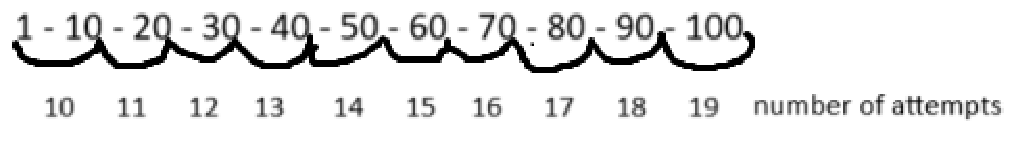<br/>
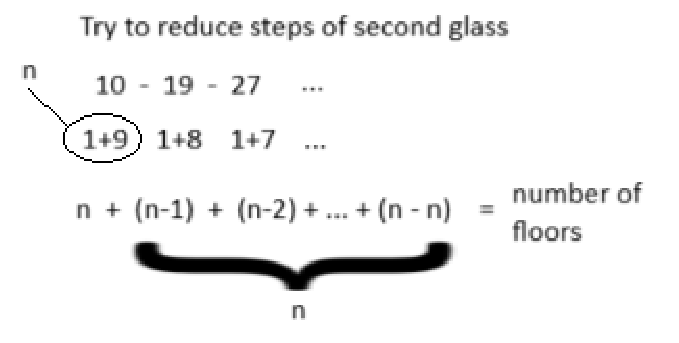<br/>
<br/>
Let the number of floors be L, then : $$ L =  n + n*n - \sum_{i=1}^{n} $$

Input is the number of attempts **n**, at the output we have the number of floors that can be processed by this number of attempts.<br/>
Let's make a function in python to calculate this

In [1]:
import numpy as np 

def num_of_floors(n:int):
    return n+n*n -np.sum([i for i in range(1,n+1)])

### Now we need just find optimal n for our number of floors

In [2]:
def find_minimal_attempts(L):
    n = 0
    while True:
        temp = num_of_floors(n)
        if temp >= L :
            break
        n+=1
    return n

find_minimal_attempts(100)

14

# So final result for 2 glasses and 100 floors is <font color=lime>**14**</font>

In [3]:
for i in range (1,21):
    print(f"n = {i}, L = {num_of_floors(i)}")

n = 1, L = 1
n = 2, L = 3
n = 3, L = 6
n = 4, L = 10
n = 5, L = 15
n = 6, L = 21
n = 7, L = 28
n = 8, L = 36
n = 9, L = 45
n = 10, L = 55
n = 11, L = 66
n = 12, L = 78
n = 13, L = 91
n = 14, L = 105
n = 15, L = 120
n = 16, L = 136
n = 17, L = 153
n = 18, L = 171
n = 19, L = 190
n = 20, L = 210


<hr>

## Now let's go from 2 cups to 3.

Let's try to calculate how many floors we can effectively bypass in 6 attempts and 3 cups. 

We are using one of 6 attempts to determine where the first glass broke, and 5 others attempts for 2 other cups. But we know how many floors we can process with 2 cups and 5 attempts, it is 15. So, if first cup was broken it was on 16 floor, if it is not - moving forward, and calculate where we are going drop it in second time. <br/><br/>
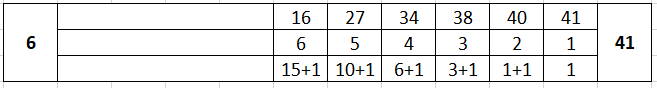<br/>

In the worst case we got 41 floors.



Same for 7 attempts: <br/>

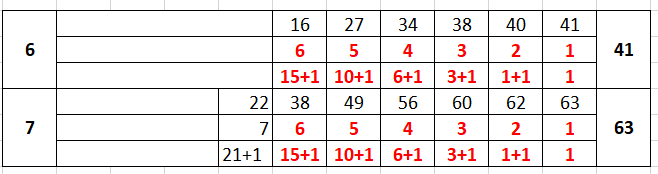
<br/>
<br/>

But if you look closely, there is a certain regularity. <br/>
7 attempts includes previous, and has only a particle of the new, which is equal to ```num_of_floors(7-1) + 1``` (21 + 1).

so Attempt 8 will be: 63 ( previous attempt ) + ```Number of floors with 2 cups 7 ```  add 1 <br/>
$$ A_3(8) = 63+(28 + 1) = 92 $$

### By this rule we can create a matrix of answers:

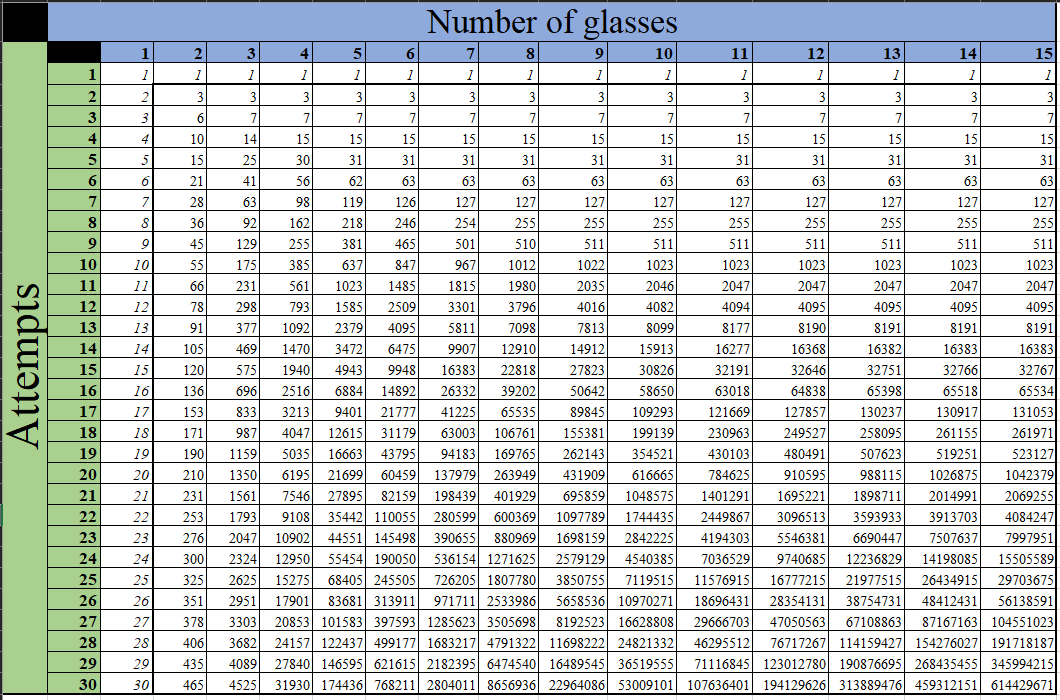

In [4]:
def create_matrix_of_answers(cups, attempts):
    cups += 1
    attempts += 1
    ans = np.zeros([attempts, cups])

    for i in range(attempts):
        ans[i, 0] = i
    for i in range(cups):
        ans[0, i] = i
    for i in range(attempts):
        ans[i, 1] = i
    for i in range(cups):
        ans[1, i] = 1

    for i in range(2, attempts):
        for j in range(2, cups):
            ans[i, j] = ans[i-1, j-1] + ans[i-1, j] + 1

    return ans

In [5]:
import pandas as pd 

df = pd.DataFrame(create_matrix_of_answers(15,30))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4,4.0,4.0,10.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
5,5.0,5.0,15.0,25.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
6,6.0,6.0,21.0,41.0,56.0,62.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
7,7.0,7.0,28.0,63.0,98.0,119.0,126.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
8,8.0,8.0,36.0,92.0,162.0,218.0,246.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
9,9.0,9.0,45.0,129.0,255.0,381.0,465.0,501.0,510.0,511.0,511.0,511.0,511.0,511.0,511.0,511.0


In [6]:
def glass_dropping(cups, floors):
    answers = create_matrix_of_answers(cups,int(floors/2))
    for i in range(100):
        if answers[i+2,cups] >= floors:
            return int(answers[i+2,0])

print(glass_dropping(2,10))
print(glass_dropping(2,100))

4
14


### So it works fine.
Now let's return to condition of the task.
We need to calculate minimal numbers of attempts choosing worst case for:
- 100 floors and 2 cups
- 1000 floors and 3 cups
- 1000 floors and 5 cups

<hr/>

## Solution:

In [7]:
print(f"For 100 floors and 2 cups = {glass_dropping(cups=2, floors=100)}")
print(f"For 1000 floors and 3 cups = {glass_dropping(cups=3, floors=1000)}")
print(f"For 1000 floors and 5 cups = {glass_dropping(cups=5, floors=1000)}")

For 100 floors and 2 cups = 14
For 1000 floors and 3 cups = 19
For 1000 floors and 5 cups = 11


<font size="6px" color=lime>

For 100 floors and 2 cups = **14** <br/>
For 1000 floors and 3 cups = **19** <br/>
For 1000 floors and 5 cups = **11** <br/>
</font>